In [1]:
# Tutorial form : https://realpython.com/knn-python/
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases"
    "/abalone/abalone.data"
)

In [2]:
abalone=pd.read_csv(url,header=None)

In [3]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

In [5]:
abalone=abalone.drop("Sex",axis=1)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<function matplotlib.pyplot.show(close=None, block=None)>

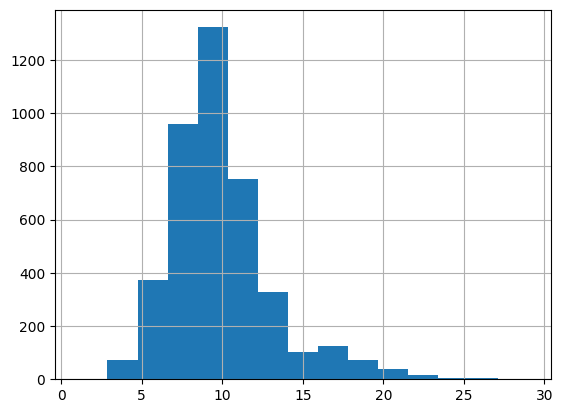

In [6]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show

In [7]:
correlation_matrix=abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [8]:
correlation_matrix["Length"]

Length            1.000000
Diameter          0.986812
Height            0.827554
Whole weight      0.925261
Shucked weight    0.897914
Viscera weight    0.903018
Shell weight      0.897706
Rings             0.556720
Name: Length, dtype: float64

In [9]:
X=abalone.drop("Rings",axis=1)
X=X.values
y=abalone["Rings"]
y=y.values

In [10]:
import numpy as np
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

In [11]:
distances=np.linalg.norm(X-new_data_point,axis=1)
print(np.size(distances))

4177


In [12]:
k=3
nearest_neighbor_ids=distances.argsort()
print(np.size(nearest_neighbor_ids))
nearest_neighbor_ids=nearest_neighbor_ids[:k]
print(np.size(nearest_neighbor_ids))
nearest_neighbor_ids

4177
3


array([4045, 1902, 1644], dtype=int64)

In [13]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [14]:
predication=nearest_neighbor_rings.mean()
predication

10.0

In [15]:
import scipy.stats
class_neighbor=np.array(["A","B","B","C"])
scipy.stats.mode(class_neighbor)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)

In [18]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds=knn_model.predict(X_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
print(rmse)

test_preds=knn_model.predict(X_test)
mse=mean_squared_error(y_test,test_preds)
rmse=sqrt(mse)
print(rmse)

1.6538366794859511
2.375417924000521


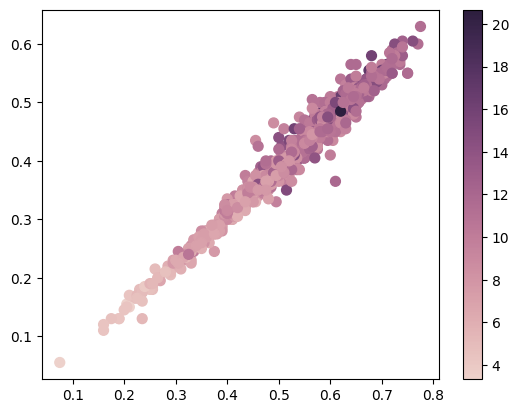

In [22]:
import seaborn as sns
cmap= sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(
    X_test[:,0],X_test[:,1],c=test_preds,s=50,cmap=cmap
)
f.colorbar(points)
plt.show()

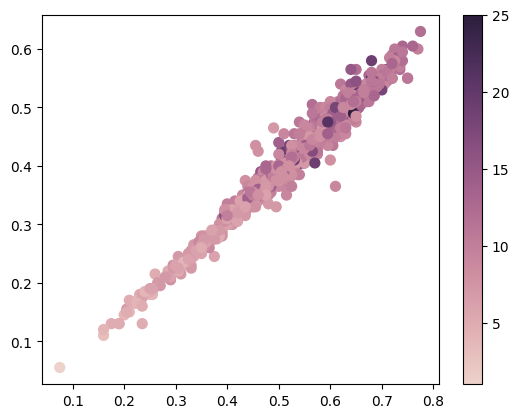

In [23]:
cmap= sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(
    X_test[:,0],X_test[:,1],c=y_test,s=50,cmap=cmap
)
f.colorbar(points)
plt.show()

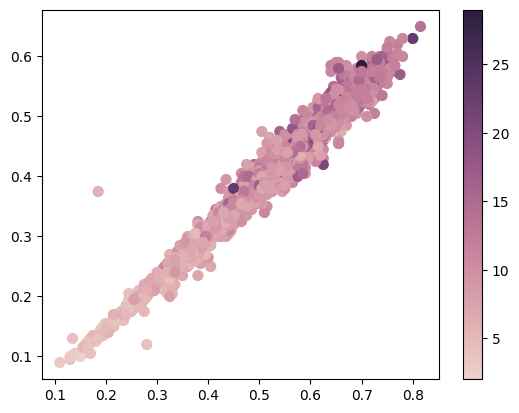

In [24]:
cmap= sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(
    X_train[:,0],X_train[:,1],c=y_train,s=50,cmap=cmap
)
f.colorbar(points)
plt.show()

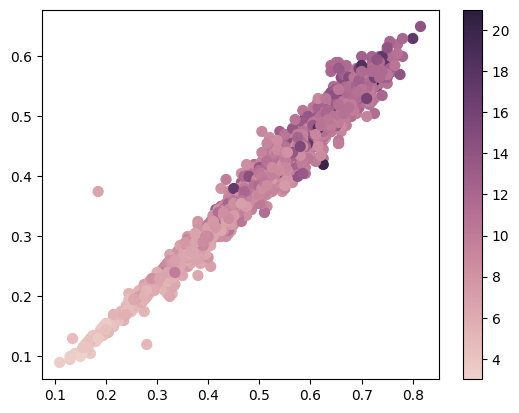

In [25]:
cmap= sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(
    X_train[:,0],X_train[:,1],c=train_preds,s=50,cmap=cmap
)
f.colorbar(points)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [32]:
print(gridsearch.best_score_)
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)
print(gridsearch.best_index_)


0.5435957721778901
{'n_neighbors': 25}
KNeighborsRegressor(n_neighbors=25)
24


In [33]:
train_preds_grid=gridsearch.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)
test_preds_grid=gridsearch.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)
print(train_rmse)
print(test_rmse)

2.0731180327543384
2.1700197339962175


In [34]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}

gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)


print(gridsearch.best_params_)


train_preds_grid=gridsearch.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)
test_preds_grid=gridsearch.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)
print(train_rmse)
print(test_rmse)

{'n_neighbors': 25, 'weights': 'distance'}
0.0
2.1634265584947485


In [35]:
best_k=gridsearch.best_params_["n_neighbors"]
best_weight=gridsearch.best_params_["weights"]
bagged_knn=KNeighborsRegressor(n_neighbors=best_k,weights=best_weight)

from sklearn.ensemble import BaggingRegressor
bagging_model=BaggingRegressor(bagged_knn,n_estimators=100)
bagging_model.fit(X_train,y_train)

train_preds_grid=bagging_model.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)
test_preds_grid=bagging_model.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)
print(train_rmse)
print(test_rmse)

0.8008439863878682
2.163647720957587
